<a href="https://colab.research.google.com/github/MaliniVibin1502/MachineLearning/blob/main/Irisflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Machine learning project done on Iris flower dataset received during a course done on Freecodecamp in Tensorflow. The goal of this project is to identify the gievn set of flowers belong to 3 different classes of Iris flowers. The three classes of Iris flowers are:
- Setosa
- Versicolor
- Virginica

The features that are considered here for the classification are:
- Sepal length
- Sepal width
- Petal length
- Petal width

 Python packages used in this project are Sckitlearn, Numpy, Pandas, seaborn and Tensorflow.

In [1]:
!pip install -q  sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install future

In [3]:
from __future__ import absolute_import, print_function, division, unicode_literals
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

Defining the features and the species of Iris flowers as mentioned above

In [5]:
column_names=['sepallength','sepalwidth','petallength','petalwidth', 'species']
species=['Setosa','Versicolor','Virginica']

In [6]:
iris= pd.read_csv('https://raw.githubusercontent.com/MaliniVibin1502/MachineLearning/main/irisflower.csv', names=column_names, header=0)
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


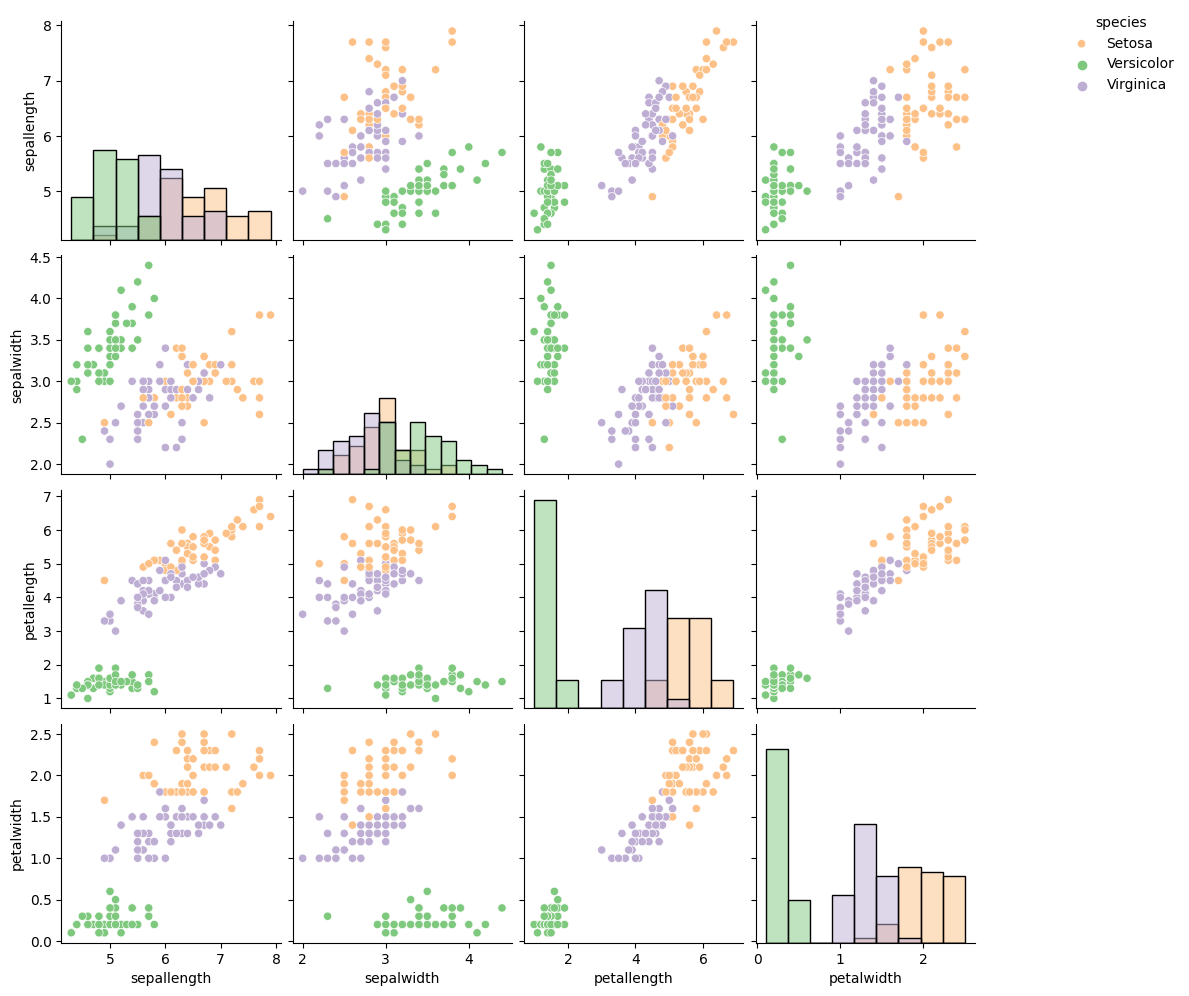

In [55]:
flower_spec=iris[['sepallength','sepalwidth','petallength','petalwidth', 'species']]
s = sb.pairplot(flower_spec,  hue='species', palette='Accent',diag_kind="hist")
sb.move_legend(s, "upper left",bbox_to_anchor=(1, 1), labels=['Setosa','Versicolor','Virginica'])



In [7]:
iris_x= iris.drop(['species'], axis=1)
iris_y= iris['species']

In [8]:
iris_x.head()

,sepallength,sepalwidth,petallength,petalwidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [9]:
iris_x_train,iris_x_eval,iris_y_train,iris_y_eval= train_test_split(iris_x,iris_y,test_size=0.30, random_state=21)

In [10]:
iris_x_eval.head()

,sepallength,sepalwidth,petallength,petalwidth
92,5.1,3.5,1.4,0.3
44,4.7,3.2,1.6,0.2
7,6.9,3.1,5.1,2.3
21,6.4,2.8,5.6,2.1
95,4.6,3.4,1.4,0.3


In [18]:
def input_fn(features, labels, training=True, batch_size=256):
      dataset=tf.data.Dataset.from_tensor_slices((dict(features),labels))
      if training:
        dataset=dataset.shuffle(1000).repeat()
      return dataset.batch(batch_size)


In [19]:
iris_feature_columns=[]
for key in iris_x_train.keys():
  iris_feature_columns.append(tf.feature_column.numeric_column(key=key))


In [21]:
classifier=tf.estimator.DNNClassifier(feature_columns=iris_feature_columns, hidden_units=[30,10],n_classes=3)


In [22]:
classifier.train(
    input_fn=lambda: input_fn(iris_x_train,iris_y_train, training= True),
    steps=5000
)

In [23]:
result_eval= classifier.evaluate(input_fn=lambda: input_fn(iris_x_train,iris_y_train, training= False))
result_eval


{'accuracy': 0.9809524,
 'average_loss': 0.3128616,
 'loss': 0.3128616,
 'global_step': 5000}

Prediction model, to predict the inputed values are under which category of flower within the three species

In [24]:
def input_fn(features,batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['sepallength','sepalwidth','petallength','petalwidth']
predict = {}

print("Please type features of the flower in numeric")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature]= [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]


print('Prediction is "{}" ({:.1f}%)'.format(species[class_id], 100* probability))

Please type features of the flower in numeric
sepallength: 1.5
sepalwidth: 2.4
petallength: 3.5
petalwidth: 3.6
Prediction is "Virginica" (96.2%)
